<h1> LOAIZA CORONADO RODRIGO JAIRO</h1>
<h2> ING. DE SISTEMAS</h2>
data set de presdiccion de nivel de obesidad
'Insufficient_Weight' : 0,
'Normal_Weight' : 1,
'Overweight_Level_I' : 2,
'Overweight_Level_II' : 3,
'Obesity_Type_I' : 4,
'Obesity_Type_II' : 5,
'Obesity_Type_III' : 6,

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Cálculo científico y vectorial para python
import numpy as np
# Libreria para graficos
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


PREPROCESAMIENTO DE DATOS
Los datos se cargan a dos variables una contiene las X file_path_features y la otra contiene las 'y' file_path_target

In [4]:
# Cargar los datasets desde los archivos CSV
file_path_features = '/content/drive/MyDrive/SIS420 Inteligencia Artificial/SegundoSemestre/Dataset/features_v1'
file_path_target = '/content/drive/MyDrive/SIS420 Inteligencia Artificial/SegundoSemestre/Dataset/target'
data = pd.read_csv(file_path_features, header=0)  # 'header=0' asegura que la primera fila sea tratada como cabeceras


# Verificar que las cabeceras se hayan leído correctamente
print(data.head())  # Esto mostrará las primeras filas del dataset junto con los nombres de las columnas

# Eliminar la primera columna irrelevante
data = data.iloc[:, 1:]

# Cargar las clases (Y)
target_data = pd.read_csv(file_path_target)
y = target_data.iloc[:, -1]  # Solo la columna de clases (NObeyesdad)

   Unnamed: 0  Gender  family_history_with_overweight  FAVC  CAEC  SMOKE  SCC  \
0           0       0                               1     0     2      0    0   
1           1       0                               1     0     2      1    1   
2           2       1                               1     0     2      0    0   
3           3       1                               0     0     2      0    0   
4           4       1                               0     0     2      0    0   

   CALC  MTRANS       Age    Height    Weight  FCVC       NCP  CH2O       FAF  \
0     3       3  0.148936  0.320755  0.186567   0.5  0.666667   0.5  0.000000   
1     2       3  0.148936  0.132075  0.126866   1.0  0.666667   1.0  1.000000   
2     1       3  0.191489  0.660377  0.283582   0.5  0.666667   0.5  0.666667   
3     1       4  0.276596  0.660377  0.358209   1.0  0.666667   0.5  0.666667   
4     2       3  0.170213  0.622642  0.379104   0.5  0.000000   0.5  0.000000   

   TUE        BMI  
0  0.5

1. Se insertan atributos de booleanos, caracteres y textos al data set

In [5]:
#A partir de esta fila mantendremos el data set original en data y usaremos data_sintetic para el dataset sintetico
data_sintetic = data.copy();
# Columna `realiza_ejercicio`: Valores booleanos 0 o 1
data_sintetic['realiza_ejercicio'] = np.random.choice([0, 1], size=len(data_sintetic))

# Columna `nivel_actividad`: Valores categóricos ('Bajo', 'Moderado', 'Alto')
niveles_actividad = ['B', 'M', 'A']
data_sintetic['nivel_actividad'] = np.random.choice(niveles_actividad, size=len(data_sintetic))
# Medicación
text = ['antidepresivos', 'antipsicóticos', 'betabloqueantes','glucocorticoides','insulina','0']
data_sintetic['Medicamentos'] = np.random.choice(text, size=data_sintetic.shape[0])



In [6]:
# Verificar el dataset después de agregar las nuevas columnas
print(data_sintetic.head())

   Gender  family_history_with_overweight  FAVC  CAEC  SMOKE  SCC  CALC  \
0       0                               1     0     2      0    0     3   
1       0                               1     0     2      1    1     2   
2       1                               1     0     2      0    0     1   
3       1                               0     0     2      0    0     1   
4       1                               0     0     2      0    0     2   

   MTRANS       Age    Height    Weight  FCVC       NCP  CH2O       FAF  TUE  \
0       3  0.148936  0.320755  0.186567   0.5  0.666667   0.5  0.000000  0.5   
1       3  0.148936  0.132075  0.126866   1.0  0.666667   1.0  1.000000  0.0   
2       3  0.191489  0.660377  0.283582   0.5  0.666667   0.5  0.666667  0.5   
3       4  0.276596  0.660377  0.358209   1.0  0.666667   0.5  0.666667  0.0   
4       3  0.170213  0.622642  0.379104   0.5  0.000000   0.5  0.000000  0.0   

         BMI  realiza_ejercicio nivel_actividad      Medicamentos  


2. Duplicamos el data set considerando los valores min y max de cada columna para generar valores randomicos

In [7]:
# Calcular los valores mínimos y máximos de cada columna
min_values = data_sintetic.min()
max_values = data_sintetic.max()

# Generar nuevos valores aleatorios dentro de los rangos mínimos y máximos
new_data = pd.DataFrame()
for column in data_sintetic.columns:
    if data_sintetic[column].dtype == 'object':
        new_data[column] = np.random.choice(data_sintetic[column].unique(), size=len(data_sintetic))
    else:
        new_data[column] = np.random.uniform(min_values[column], max_values[column], size=len(data_sintetic))

# Concatenar el dataset original con el nuevo dataset generado
augmented_data = pd.concat([data_sintetic, new_data], ignore_index=True)

# Verificar el tamaño del nuevo dataset
print(data_sintetic.shape)
print(augmented_data.shape)
print(augmented_data.tail())

(22869, 20)
(45738, 20)
         Gender  family_history_with_overweight      FAVC      CAEC     SMOKE  \
45733  0.432831                        0.076329  0.386836  2.259979  0.890414   
45734  0.576113                        0.053043  0.794488  2.062202  0.479970   
45735  0.716253                        0.153583  0.140144  0.436234  0.749275   
45736  0.357667                        0.530065  0.308607  1.808266  0.508276   
45737  0.393315                        0.255491  0.608500  1.241216  0.467473   

            SCC      CALC    MTRANS       Age    Height    Weight      FCVC  \
45733  0.348043  2.377131  1.284841  0.350903  0.119500  0.091008  0.103979   
45734  0.650903  0.399248  0.005010  0.279283  0.470733  0.526865  0.974167   
45735  0.997824  0.212261  0.189199  0.494201  0.283664  0.752841  0.243095   
45736  0.686116  1.190590  3.203590  0.624262  0.859100  0.248046  0.243136   
45737  0.759282  1.311206  0.388366  0.148258  0.622006  0.297885  0.855689   

            NC

Tambien duplicamos la y

In [8]:
# Duplicar las etiquetas de y para que coincidan con el tamaño del dataset aumentado
new_y = np.random.choice(y, size=len(new_data), replace=True)  # Genera etiquetas aleatorias del conjunto original

# Concatenar las etiquetas originales con las nuevas etiquetas generadas
augmented_y = np.concatenate([y, new_y])

# Verificar el tamaño de augmented_y
print(f"Dimensiones de y original: {y.shape}")
print(f"Dimensiones de y aumentado: {augmented_y.shape}")


Dimensiones de y original: (22869,)
Dimensiones de y aumentado: (45738,)


In [9]:
augmented_data['Gender'] = augmented_data['Gender'].round().astype(int)
augmented_data['family_history_with_overweight'] = augmented_data['family_history_with_overweight'].round().astype(int)
augmented_data['FAVC'] = augmented_data['FAVC'].round().astype(int)
augmented_data['SMOKE'] = augmented_data['SMOKE'].round().astype(int)
augmented_data['SCC'] = augmented_data['SCC'].round().astype(int)
augmented_data['CALC'] = augmented_data['CALC'].round().astype(int)
augmented_data['MTRANS'] = augmented_data['MTRANS'].round().astype(int)


In [10]:
print(augmented_data)

       Gender  family_history_with_overweight  FAVC      CAEC  SMOKE  SCC  \
0           0                               1     0  2.000000      0    0   
1           0                               1     0  2.000000      1    1   
2           1                               1     0  2.000000      0    0   
3           1                               0     0  2.000000      0    0   
4           1                               0     0  2.000000      0    0   
...       ...                             ...   ...       ...    ...  ...   
45733       0                               0     0  2.259979      1    0   
45734       1                               0     1  2.062202      0    1   
45735       1                               0     0  0.436234      1    1   
45736       0                               1     0  1.808266      1    1   
45737       0                               0     1  1.241216      0    1   

       CALC  MTRANS       Age    Height    Weight      FCVC       NCP  \
0 

In [11]:
# 1. Convertir la columna 'nivel_actividad' a valores numéricos
# Asignar un número a cada letra (por ejemplo, A: 0, B: 1, ..., E: 4)
char_to_num = {'B': 0, 'M': 1, 'A': 2}
augmented_data['nivel_actividad'] = augmented_data['nivel_actividad'].map(char_to_num)

# 2. Convertir la columna 'Medicamentos' a valores numéricos
# Asignar un valor a cada categoría de texto (por ejemplo, no: 0, sometimes: 1, Frequently: 2)
text_to_num = {'0':0,'antidepresivos': 1,  'antipsicóticos':2, 'betabloqueantes':3,'glucocorticoides':4,'insulina':5}
augmented_data['Medicamentos'] = augmented_data['Medicamentos'].map(text_to_num)
print(augmented_data)

       Gender  family_history_with_overweight  FAVC      CAEC  SMOKE  SCC  \
0           0                               1     0  2.000000      0    0   
1           0                               1     0  2.000000      1    1   
2           1                               1     0  2.000000      0    0   
3           1                               0     0  2.000000      0    0   
4           1                               0     0  2.000000      0    0   
...       ...                             ...   ...       ...    ...  ...   
45733       0                               0     0  2.259979      1    0   
45734       1                               0     1  2.062202      0    1   
45735       1                               0     0  0.436234      1    1   
45736       0                               1     0  1.808266      1    1   
45737       0                               0     1  1.241216      0    1   

       CALC  MTRANS       Age    Height    Weight      FCVC       NCP  \
0 

3. Grafica que representa los datos de algunas columnas del data set original vs el data set sintetico

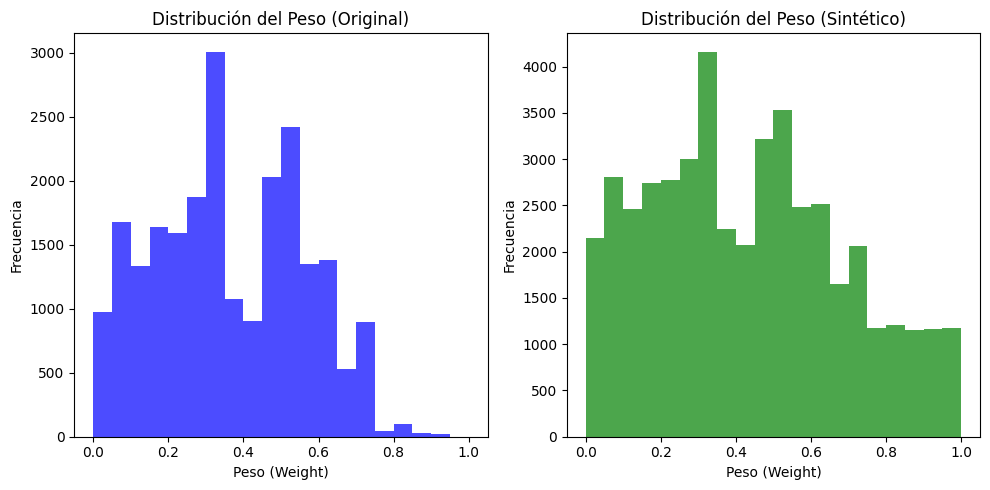

In [12]:
# Comparar la columna 'Weight' entre el dataset original y el dataset sintetico
# Histograma del dataset original (data)
plt.figure(figsize=(10, 5))
# Histograma del dataset original
plt.subplot(1, 2, 1)
plt.hist(data['Weight'], bins=20, color='blue', alpha=0.7, label='Original')
plt.title('Distribución del Peso (Original)')
plt.xlabel('Peso (Weight)')
plt.ylabel('Frecuencia')

# Histograma del dataset sintético (augmented_data)
plt.subplot(1, 2, 2)
plt.hist(augmented_data['Weight'], bins=20, color='green', alpha=0.7, label='Sintético')
plt.title('Distribución del Peso (Sintético)')
plt.xlabel('Peso (Weight)')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


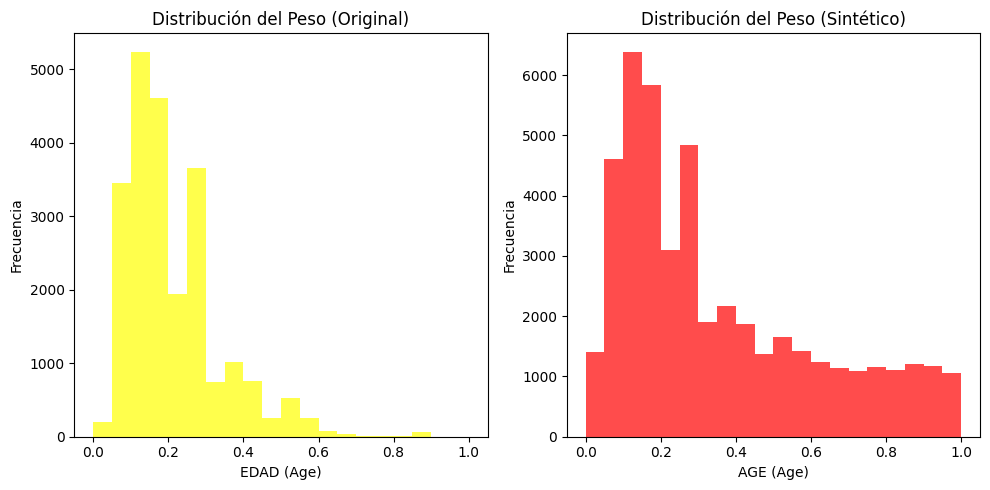

In [13]:
# Comparar la columna 'Age' entre el dataset original y el dataset sintetico
# Histograma del dataset original (data)
plt.figure(figsize=(10, 5))

# Histograma del dataset original
plt.subplot(1, 2, 1)
plt.hist(data['Age'], bins=20, color='yellow', alpha=0.7, label='Original')
plt.title('Distribución del Peso (Original)')
plt.xlabel('EDAD (Age)')
plt.ylabel('Frecuencia')

# Histograma del dataset sintético (augmented_data)
plt.subplot(1, 2, 2)
plt.hist(augmented_data['Age'], bins=20, color='red', alpha=0.7, label='Sintético')
plt.title('Distribución del Peso (Sintético)')
plt.xlabel('AGE (Age)')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

REGRESION LOGISTICA


NROMALIZACION
Normalizamos augmented_data

In [14]:
# Función sigmoide
def calcularSigmoide(z):
    z = np.array(z)
    return 1 / (1 + np.exp(-z))

In [15]:
# Función de costo para regresión logística binaria
def calcularCosto(theta, X, y):
    m = y.size  # número de ejemplos de entrenamiento
    h = calcularSigmoide(X.dot(theta.T))
    epsilon = 1e-5  # Para evitar problemas de logaritmo de 0
    h = np.clip(h, epsilon, 1 - epsilon)  # Restringir h entre (epsilon, 1 - epsilon)
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    return J

In [16]:
# Función de descenso por gradiente para actualizar theta
def descensoGradiente(theta, X, y, alpha, num_iters):
    m = y.size
    J_history = []

    for i in range(num_iters):
        h = calcularSigmoide(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)
        J_history.append(calcularCosto(theta, X, y))

    return theta, J_history

In [17]:
# Función para hacer predicciones
def predecir(X, theta):
    return (calcularSigmoide(X.dot(theta.T)) >= 0.5).astype(int)

In [18]:
def normalizar_caracteristicas(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma



In [19]:
# Dividir el dataset en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(augmented_data, augmented_y, test_size=0.2, random_state=42)
# Normalizar las características del conjunto de entrenamiento
X_train_norm, mu, sigma = normalizar_caracteristicas(X_train)

# Normalizar el conjunto de prueba utilizando los mismos parámetros (mu, sigma) del conjunto de entrenamiento
X_test_norm = (X_test - mu) / sigma




In [24]:
# Parámetros de regresión logística
alpha = 0.01
num_iters = 1000

# Función para entrenar y evaluar una clase
def entrenar_y_evaluar_clase(clase_objetivo):
    # Crear etiquetas binarias: 1 para la clase objetivo, 0 para las demás
    y_train_binario = (y_train == clase_objetivo).astype(int) #convierte True en 1 y False en 0

    # Agregar una columna de unos para el término de intercepción (bias)
    m, n = X_train_norm.shape
    X_train_bias = np.concatenate([np.ones((m, 1)), X_train_norm], axis=1)

    # Inicializar theta (parámetros del modelo)
    theta_inicial = np.zeros(n + 1)

    # Ejecutar el descenso por gradiente
    theta, J_history = descensoGradiente(theta_inicial, X_train_bias, y_train_binario, alpha, num_iters)

    # Graficar la convergencia del costo
    plt.plot(np.arange(len(J_history)), J_history, lw=2)
    plt.xlabel('Número de iteraciones')
    plt.ylabel('Costo J')
    plt.title(f'Convergencia del costo para la clase {clase_objetivo}')
    plt.show()

    # Evaluar la precisión en el conjunto de prueba
    m_test = X_test_norm.shape[0]
    X_test_bias = np.concatenate([np.ones((m_test, 1)), X_test_norm], axis=1)
    y_pred = predecir(X_test_bias, theta)

    # Calcular la precisión manualmente
    aciertos = np.sum(y_pred == (y_test == clase_objetivo).astype(int))
    precision = aciertos / m_test
    print(f'Precisión para la clase {clase_objetivo}: {precision * 100:.2f}%')

    # Mostrar los resultados del descenso por gradiente
    print(f'Theta calculado para la clase {clase_objetivo}: {theta}')




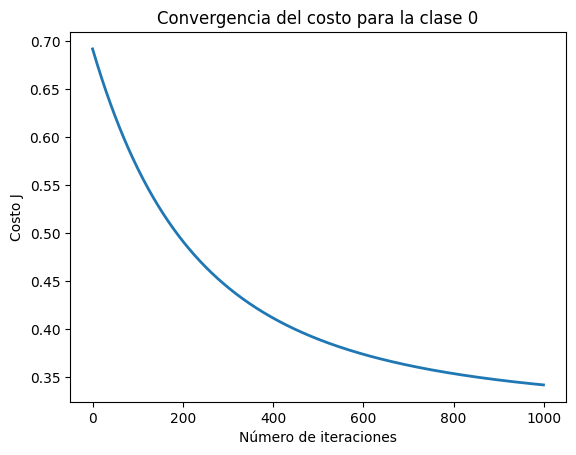

Precisión para la clase 0: 87.69%
Theta calculado para la clase 0: [-1.58569265e+00 -7.17921358e-02 -1.83508162e-01 -2.14238385e-02
 -1.04382992e-01  8.12329647e-03  4.30469833e-02  2.74986047e-02
  2.65539815e-02 -7.68574793e-02  3.67319225e-03 -2.41277612e-01
  4.58753570e-02  7.06273219e-02 -8.87323166e-02  5.83672447e-02
  8.03775492e-02 -2.70515941e-01  1.53319713e-03  7.14498029e-03
  2.04941403e-03]


In [25]:
# Entrenar y evaluar la primera clase
entrenar_y_evaluar_clase(0)


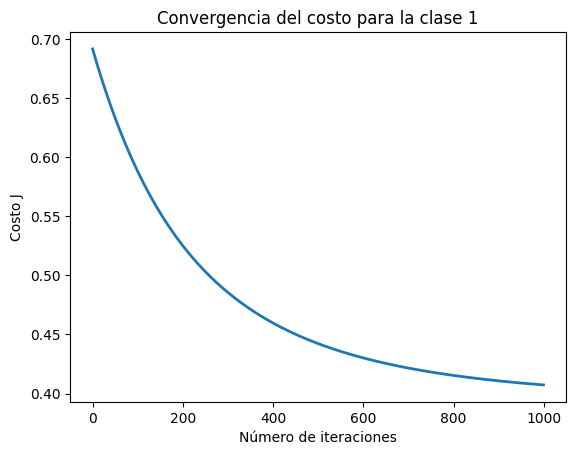

Precisión para la clase 1: 84.95%
Theta calculado para la clase 1: [-1.42830579 -0.01257697 -0.12647396 -0.05278069 -0.09914305  0.02151855
  0.00811143  0.02245014  0.05981423 -0.0523989  -0.05730383 -0.19164681
 -0.02334447  0.05323289 -0.09541594  0.07837418  0.00159481 -0.19190677
  0.00555191  0.0025013   0.00265052]


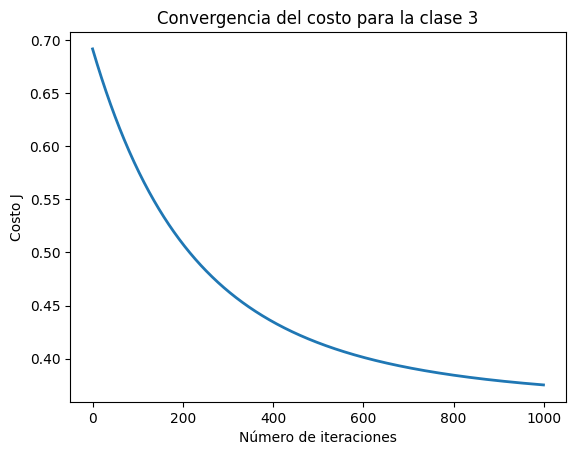

Precisión para la clase 3: 88.07%
Theta calculado para la clase 3: [-1.53919293  0.09750265  0.09228017 -0.08989985  0.02654548 -0.01002844
 -0.04879995  0.04244595 -0.08781933  0.04757425 -0.01323852 -0.05659923
 -0.09199143 -0.05104754 -0.0086179   0.00440978  0.02926164 -0.05547275
  0.00302884  0.00794145 -0.00956644]


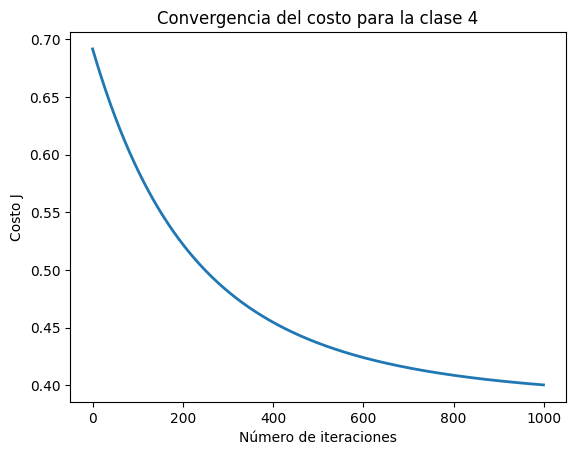

Precisión para la clase 4: 85.91%
Theta calculado para la clase 4: [-1.45932244  0.03981464  0.11123747  0.05066002  0.04641135 -0.01084179
 -0.03070949  0.09841848 -0.06036845  0.02078788 -0.0206339   0.03508327
 -0.2036024  -0.11750328  0.05414002 -0.02042579  0.06558877  0.06114522
 -0.00551237  0.01412413  0.01311599]


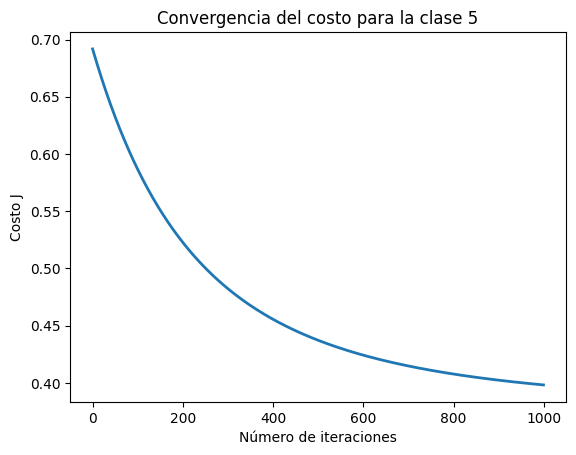

Precisión para la clase 5: 84.72%
Theta calculado para la clase 5: [-1.41503721e+00  3.36986893e-01  1.04471392e-01  6.33281973e-02
  4.28208606e-02  1.20600012e-02 -1.10758931e-02 -9.59952517e-03
 -8.44306253e-02  8.07586170e-02  1.66961900e-01  2.39189724e-01
 -1.59807002e-04  1.63889789e-02 -6.95175566e-02 -4.97246754e-03
 -1.17579971e-01  1.66999791e-01 -4.43859660e-03 -1.02979841e-02
 -1.48999700e-02]


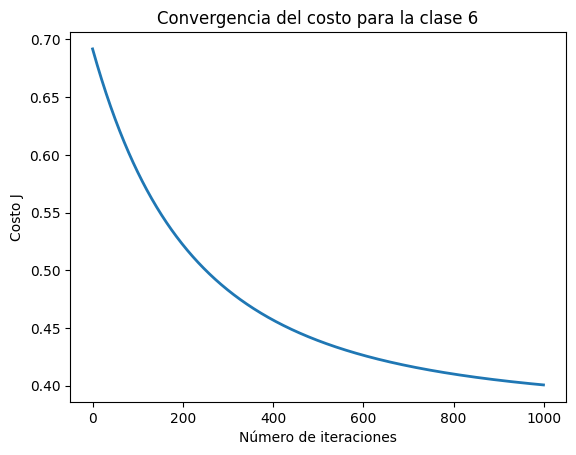

Precisión para la clase 6: 88.03%
Theta calculado para la clase 6: [-1.30345052 -0.37856975  0.07582683  0.03122626  0.02775386  0.01316696
  0.00458735 -0.12166413  0.14502149  0.01712101 -0.04928279  0.28341911
  0.30428089  0.10370807  0.15567818 -0.13999352 -0.00877492  0.35998745
  0.01104503 -0.01748068 -0.00627868]


In [30]:
# Entrenar y evaluar las demas clases
entrenar_y_evaluar_clase(1)
entrenar_y_evaluar_clase(3)
entrenar_y_evaluar_clase(4)
entrenar_y_evaluar_clase(5)
entrenar_y_evaluar_clase(6)

4. DATOS DE ENTRENAMIENTO Y DATOS DE PRUEBA

In [34]:
# Función para el enfoque One-vs-All
def entrenar_one_vs_all(X, y, num_etiquetas, alpha, num_iters):
    m, n = X.shape
    all_theta = np.zeros((num_etiquetas, n + 1))  # Guardar theta para cada clase
    X_bias = np.concatenate([np.ones((m, 1)), X], axis=1)  # Agregar columna de unos
    all_costs = []  # Lista para guardar los costos de cada clase

    for clase in range(num_etiquetas):
        print(f'Entrenando clase {clase} contra todas...')
        y_binario = (y == clase).astype(int)  # 1 para la clase actual, 0 para las demás
        theta_inicial = np.zeros(n + 1)
        theta, J_history = descensoGradiente(theta_inicial, X_bias, y_binario, alpha, num_iters)
        all_theta[clase, :] = theta
        all_costs.append(J_history)  # Guardar los costos para esta clase

    return all_theta, all_costs

5. Entrenamos el modelo comparando cada clase contra todos one vs all devolvemos una matriz de thetas optimizadas de cada clase y una lista que contiene el historial de costo por cada clase. esto nos sirve para graficar

In [35]:
# Función para predecir en One-vs-All
def predecir_one_vs_all(X, all_theta):
    X_bias = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
    probabilidades = calcularSigmoide(X_bias.dot(all_theta.T))
    return np.argmax(probabilidades, axis=1)

Entrenando clase 0 contra todas...
Entrenando clase 1 contra todas...
Entrenando clase 2 contra todas...
Entrenando clase 3 contra todas...
Entrenando clase 4 contra todas...
Entrenando clase 5 contra todas...
Entrenando clase 6 contra todas...


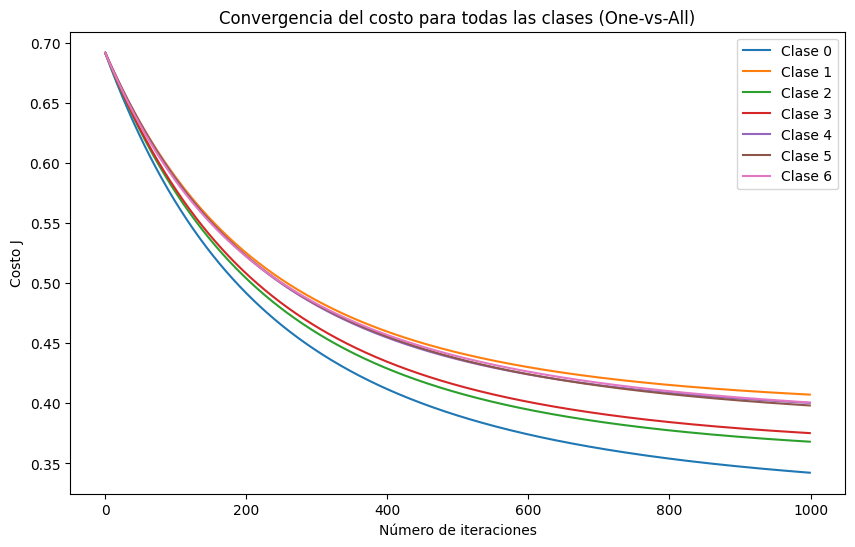

Precisión del modelo One-vs-All: 36.49%


In [36]:
# Parámetros
alpha = 0.01
num_iters = 1000
num_etiquetas = 7  # Número de clases

# Entrenar el modelo One-vs-All y obtener los costos
all_theta, all_costs = entrenar_one_vs_all(X_train_norm, y_train, num_etiquetas, alpha, num_iters)

# Graficar las curvas de costo para todas las clases
plt.figure(figsize=(10, 6))
for clase in range(num_etiquetas):
    plt.plot(np.arange(len(all_costs[clase])), all_costs[clase], label=f'Clase {clase}')
plt.xlabel('Número de iteraciones')
plt.ylabel('Costo J')
plt.title('Convergencia del costo para todas las clases (One-vs-All)')
plt.legend()
plt.show()

# Realizar predicciones en el conjunto de prueba
y_pred = predecir_one_vs_all(X_test_norm, all_theta)

# Calcular precisión
precision = np.mean(y_pred == y_test) * 100
print(f'Precisión del modelo One-vs-All: {precision:.2f}%')

In [37]:
# Predicción y evaluación
y_pred1 = predecir_one_vs_all(X_test_norm, all_theta)
precision = np.mean(y_pred == y_test)
print(f"Precisión en el conjunto de prueba: {precision * 100:.2f}%")

# Mostrar algunos ejemplos de predicciones
num_ejemplos = 5
print("\nEjemplos de predicciones:")
for i in range(num_ejemplos):
    print(f"Ejemplo {i+1}:")
    print(f"Predicción: {y_pred1[i]}")
    print(f"Valor real: {y_test[i]}")
    print()

Precisión en el conjunto de prueba: 36.49%

Ejemplos de predicciones:
Ejemplo 1:
Predicción: 5
Valor real: 3

Ejemplo 2:
Predicción: 6
Valor real: 6

Ejemplo 3:
Predicción: 0
Valor real: 0

Ejemplo 4:
Predicción: 5
Valor real: 5

Ejemplo 5:
Predicción: 1
Valor real: 0



In [38]:
import ipywidgets as widgets
from IPython.display import display
# Crear campos de entrada interactivos en Colab
labels = [f'Característica {i+1}' for i in range(X_train.shape[1])]
inputs = [widgets.FloatText(description=label, value=0.0) for label in labels]

In [39]:
# Función que se ejecuta al hacer clic en el botón de predicción
def hacer_prediccion(b):
    valores = np.array([entrada.value for entrada in inputs]).reshape(1, -1)

    # Normalizar los valores ingresados
    valores_norm = (valores - mu) / sigma

    # Realizar la predicción usando el modelo One-vs-All
    prediccion = predecir_one_vs_all(valores_norm, all_theta)

    # Mostrar el resultado
    resultado.value = f"La predicción es: Clase {prediccion[0]}"

In [40]:
# Crear botón de predicción
boton = widgets.Button(description="Predecir")
boton.on_click(hacer_prediccion)

# Crear un campo de salida para mostrar el resultado de la predicción
resultado = widgets.Text(value='', description='Resultado', disabled=True)

# Mostrar los campos de entrada y el botón
display(*inputs, boton, resultado)

FloatText(value=0.0, description='Característica 1')

FloatText(value=0.0, description='Característica 2')

FloatText(value=0.0, description='Característica 3')

FloatText(value=0.0, description='Característica 4')

FloatText(value=0.0, description='Característica 5')

FloatText(value=0.0, description='Característica 6')

FloatText(value=0.0, description='Característica 7')

FloatText(value=0.0, description='Característica 8')

FloatText(value=0.0, description='Característica 9')

FloatText(value=0.0, description='Característica 10')

FloatText(value=0.0, description='Característica 11')

FloatText(value=0.0, description='Característica 12')

FloatText(value=0.0, description='Característica 13')

FloatText(value=0.0, description='Característica 14')

FloatText(value=0.0, description='Característica 15')

FloatText(value=0.0, description='Característica 16')

FloatText(value=0.0, description='Característica 17')

FloatText(value=0.0, description='Característica 18')

FloatText(value=0.0, description='Característica 19')

FloatText(value=0.0, description='Característica 20')

Button(description='Predecir', style=ButtonStyle())

Text(value='', description='Resultado', disabled=True)